In [24]:
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import country_converter as coco
from rasterstats import zonal_stats
import rioxarray 

In [5]:
df_yield = pd.read_csv("FAOSTAT\Crops and livestock products\Production_Crops_Livestock_E_All_Data_(Normalized).csv")

C:\Users\Brandon\AppData\Local\Temp\ipykernel_29784\2662882636.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_yield = pd.read_csv("FAOSTAT\Crops and livestock products\Production_Crops_Livestock_E_All_Data_(Normalized).csv")


In [ ]:
df_yield = df_yield[df_yield["Element"] == "Yield"]

crops = ["Wheat", "Maize", "Barley"]
df_yield = df_yield[df_yield["Item"].isin(crops)]

df_yield = df_yield[["Area", "Item", "Year", "Value"]]
df_yield.columns = ["country", "crop", "year", "yield"]

df_yield["continent"] = coco.convert(df_yield["country"], to="continent")
df_yield = df_yield[df_yield["continent"] == "Europe"]
df_yield.drop(columns="continent", inplace=True)

df_yield.head()

Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxe

,country,crop,year,yield
15161,Albania,Barley,1961,1022.4
15162,Albania,Barley,1962,840.5
15163,Albania,Barley,1963,877.0
15164,Albania,Barley,1964,1025.8
15165,Albania,Barley,1965,986.5


In [ ]:
df_irrig = pd.read_csv("FAOSTAT\Land Use\Inputs_LandUse_E_All_Data_(Normalized).csv")

df_irrig = df_irrig[df_irrig["Item"] == "Land area equipped for irrigation"]
df_irrig = df_irrig[["Area", "Year", "Value"]]
df_irrig.columns = ["country", "year", "irrigated_area"]

# eu only
df_irrig["continent"] = coco.convert(df_irrig["country"], to="continent")
df_irrig = df_irrig[df_irrig["continent"] == "Europe"]
df_irrig.drop(columns="continent", inplace=True)


df_irrig.head()

Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxe

,country,year,irrigated_area
3062,Albania,1961,156.0
3063,Albania,1962,168.0
3064,Albania,1963,180.0
3065,Albania,1964,192.0
3066,Albania,1965,205.0


In [38]:
ds = xr.open_dataset("SPEI\spei01.nc")
spei = ds["spei"]

# Monthly to yearly average
spei_yearly = spei.groupby("time.year").min("time")

spei_yearly


<xarray.DataArray 'spei' (year: 123, lat: 360, lon: 720)> Size: 128MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(123, 360, 720), dtype=float32)
Coordinates:
  * year     (year) int64 984B 1901 1902 1903 1904 1905 ... 2020 2021 2022 2023
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 6kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Attributes:
    units:         1
    long_name:     Standardized Precipitation-Evapotranspiration Index
    grid_mapping:  crs

In [39]:
if spei_yearly.lat[0] < spei_yearly.lat[-1]:
    spei_yearly = spei_yearly.sortby("lat", ascending=False)

if not hasattr(spei_yearly, 'rio') or spei_yearly.rio.crs is None:
    spei_yearly = spei_yearly.rio.write_crs("EPSG:4326")

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
europe = world[world["CONTINENT"] == "Europe"]

europe = europe.to_crs("EPSG:4326")

spei_records = []

for year in spei_yearly.year.values:
    year_data = spei_yearly.sel(year=year)
    arr = year_data.values
    
    stats = zonal_stats(
        europe,
        arr,
        stats="mean",
        affine=year_data.rio.transform(),
        nodata=-9999
    )
    
    for country, s in zip(europe["NAME"], stats):
        spei_records.append({
            "country": country,
            "year": int(year),
            "spei": s["mean"] if s["mean"] is not None else None
        })

df_spei = pd.DataFrame(spei_records)
print(df_spei.head())
print(f"\nTotal records: {len(df_spei)}")
print(f"Years: {df_spei['year'].min()} to {df_spei['year'].max()}")

   country  year      spei
0   Russia  1901 -1.624509
1   Norway  1901 -1.416484
2   France  1901 -1.349115
3   Sweden  1901 -1.973995
4  Belarus  1901 -1.378275

Total records: 4797
Years: 1901 to 2023


In [40]:
df = df_yield.merge(df_spei, on=["country", "year"], how="inner")

df = df.merge(df_irrig, on=["country", "year"], how="left")

df["irrigation_intensity"] = (
    df["irrigated_area"] /
    df.groupby("country")["irrigated_area"].transform("max")
)

print(df.head())

   country    crop  year   yield      spei  irrigated_area  \
0  Albania  Barley  1961  1022.4 -2.153710          156.00   
1  Albania  Barley  1961  1022.4 -2.153710           32.57   
2  Albania  Barley  1962   840.5 -1.683993          168.00   
3  Albania  Barley  1962   840.5 -1.683993           34.50   
4  Albania  Barley  1963   877.0 -1.540250          180.00   

   irrigation_intensity  
0              0.368794  
1              0.076998  
2              0.397163  
3              0.081560  
4              0.425532  


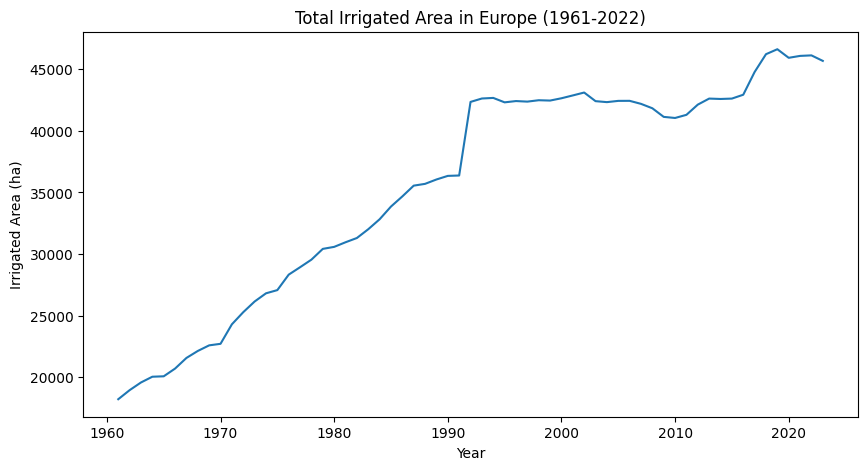

In [41]:
df.groupby("year")["irrigated_area"].sum().plot(figsize=(10,5))
plt.title("Total Irrigated Area in Europe (1961-2022)")
plt.ylabel("Irrigated Area (ha)")
plt.xlabel("Year")
plt.show()


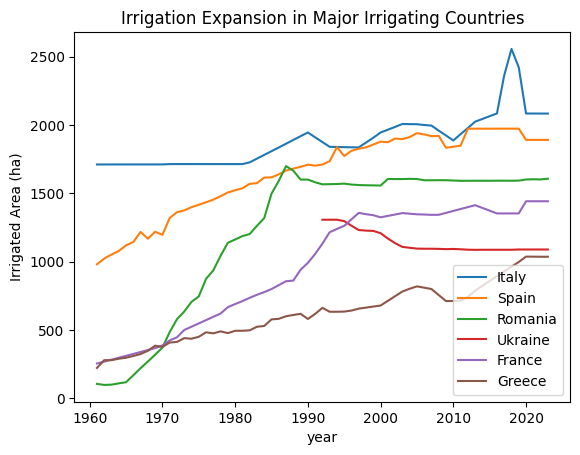

In [42]:
top_irrig = (
    df.groupby("country")["irrigated_area"]
    .mean()
    .sort_values(ascending=False)
    .head(6)
    .index
)

for c in top_irrig:
    df[df["country"] == c].groupby("year")["irrigated_area"].mean().plot(label=c)

plt.legend()
plt.title("Irrigation Expansion in Major Irrigating Countries")
plt.ylabel("Irrigated Area (ha)")
plt.show()


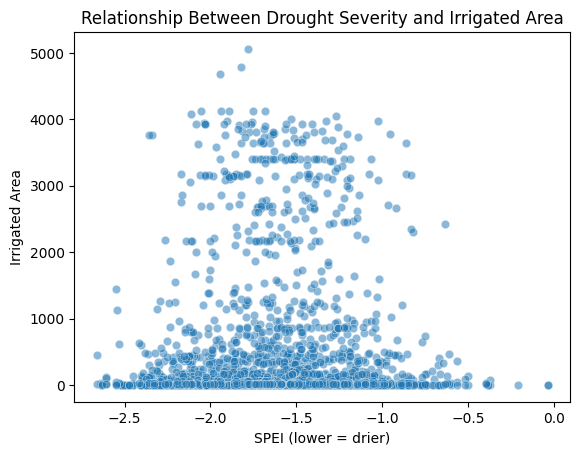

In [43]:
sns.scatterplot(data=df, x="spei", y="irrigated_area", alpha=0.3)
plt.title("Relationship Between Drought Severity and Irrigated Area")
plt.xlabel("SPEI (lower = drier)")
plt.ylabel("Irrigated Area")
plt.show()


In [44]:
#Question 2
model = smf.ols(
    "Q('yield') ~ spei + irrigation_intensity + spei:irrigation_intensity + C(country) + C(crop)",
    data=df.dropna()
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Q('yield')   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     340.5
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:29:55   Log-Likelihood:                -47855.
No. Observations:                5808   AIC:                         9.578e+04
Df Residuals:                    5773   BIC:                         9.601e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

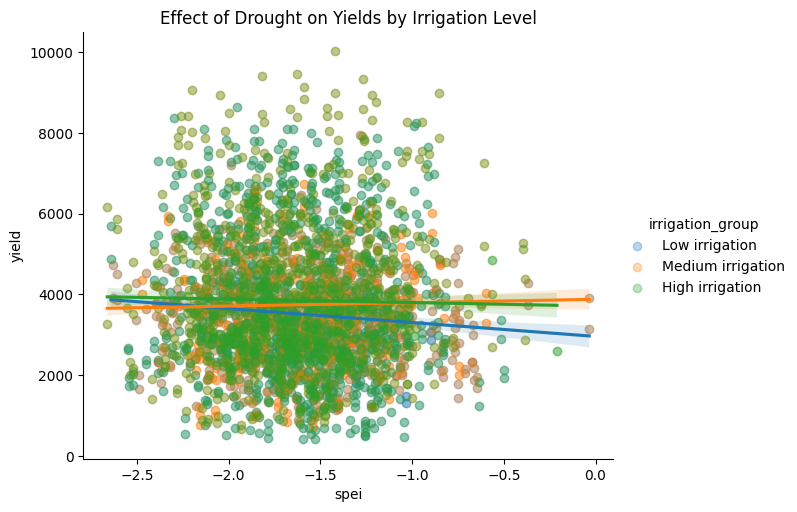

In [45]:
df["irrigation_group"] = pd.qcut(
    df["irrigation_intensity"],
    q=3,
    labels=["Low irrigation", "Medium irrigation", "High irrigation"]
)

sns.lmplot(
    data=df,
    x="spei",
    y="yield",
    hue="irrigation_group",
    scatter_kws={"alpha": 0.3},
    height=5,
    aspect=1.3
)

plt.title("Effect of Drought on Yields by Irrigation Level")
plt.show()


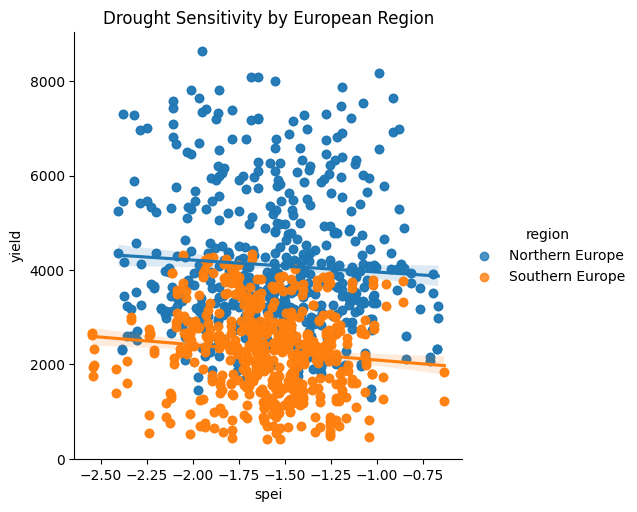

In [46]:
north = ["Sweden", "Finland", "Germany", "Poland"]
south = ["Spain", "Italy", "Greece", "Portugal"]

df["region"] = np.where(df["country"].isin(south), "Southern Europe",
                np.where(df["country"].isin(north), "Northern Europe", "Other"))

sns.lmplot(
    data=df[df["region"] != "Other"],
    x="spei",
    y="yield",
    hue="region"
)
plt.title("Drought Sensitivity by European Region")
plt.show()


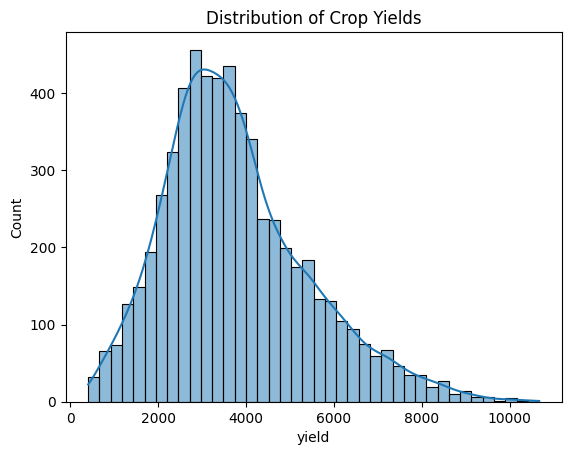

In [47]:
sns.histplot(df["yield"], bins=40, kde=True)
plt.title("Distribution of Crop Yields")
plt.show()


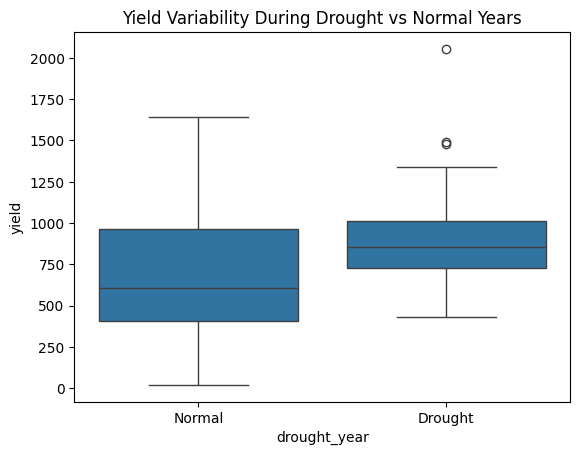

In [48]:
df["drought_year"] = df["spei"] < -1

yield_var = (
    df.groupby(["country", "drought_year"])["yield"]
      .std()
      .reset_index()
)

sns.boxplot(
    data=yield_var,
    x="drought_year",
    y="yield"
)
plt.title("Yield Variability During Drought vs Normal Years")
plt.xticks([0,1], ["Normal", "Drought"])
plt.show()


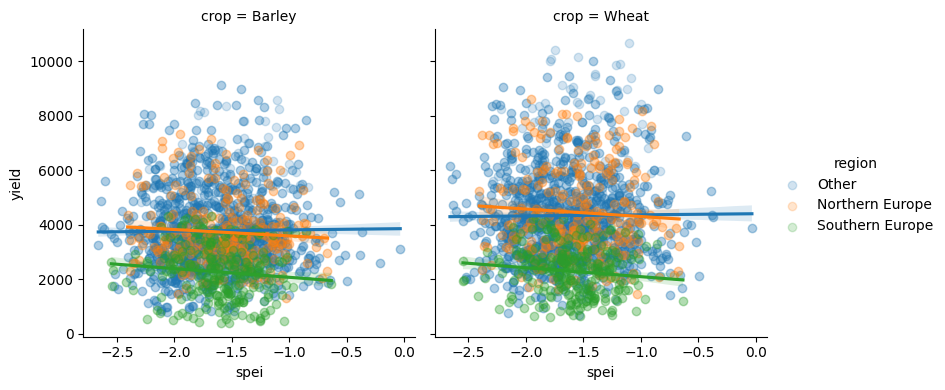

In [49]:
sns.lmplot(
    data=df,
    x="spei",
    y="yield",
    col="crop",
    hue="region",
    scatter_kws={"alpha":0.2},
    height=4
)
plt.show()
